In [7]:
import os
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d as spline

import TwoPUtils as tpu
import STX3KO_analyses as stx

%matplotlib inline


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
figdir = "/mnt/BigDisk/YMazeResults/neural/WTA"

In [3]:
nl_kwta = stx.wta.KWTA(eta=0, tau=0, w_norm_decay = 0,ca1_noise= .5, w_sigma_mag = 1E-1, ca3_sigma_mag=.05 )
nl_ca1 = nl_kwta.run_trials()


In [4]:
print(nl_ca1.shape)

(100, 30, 1000)


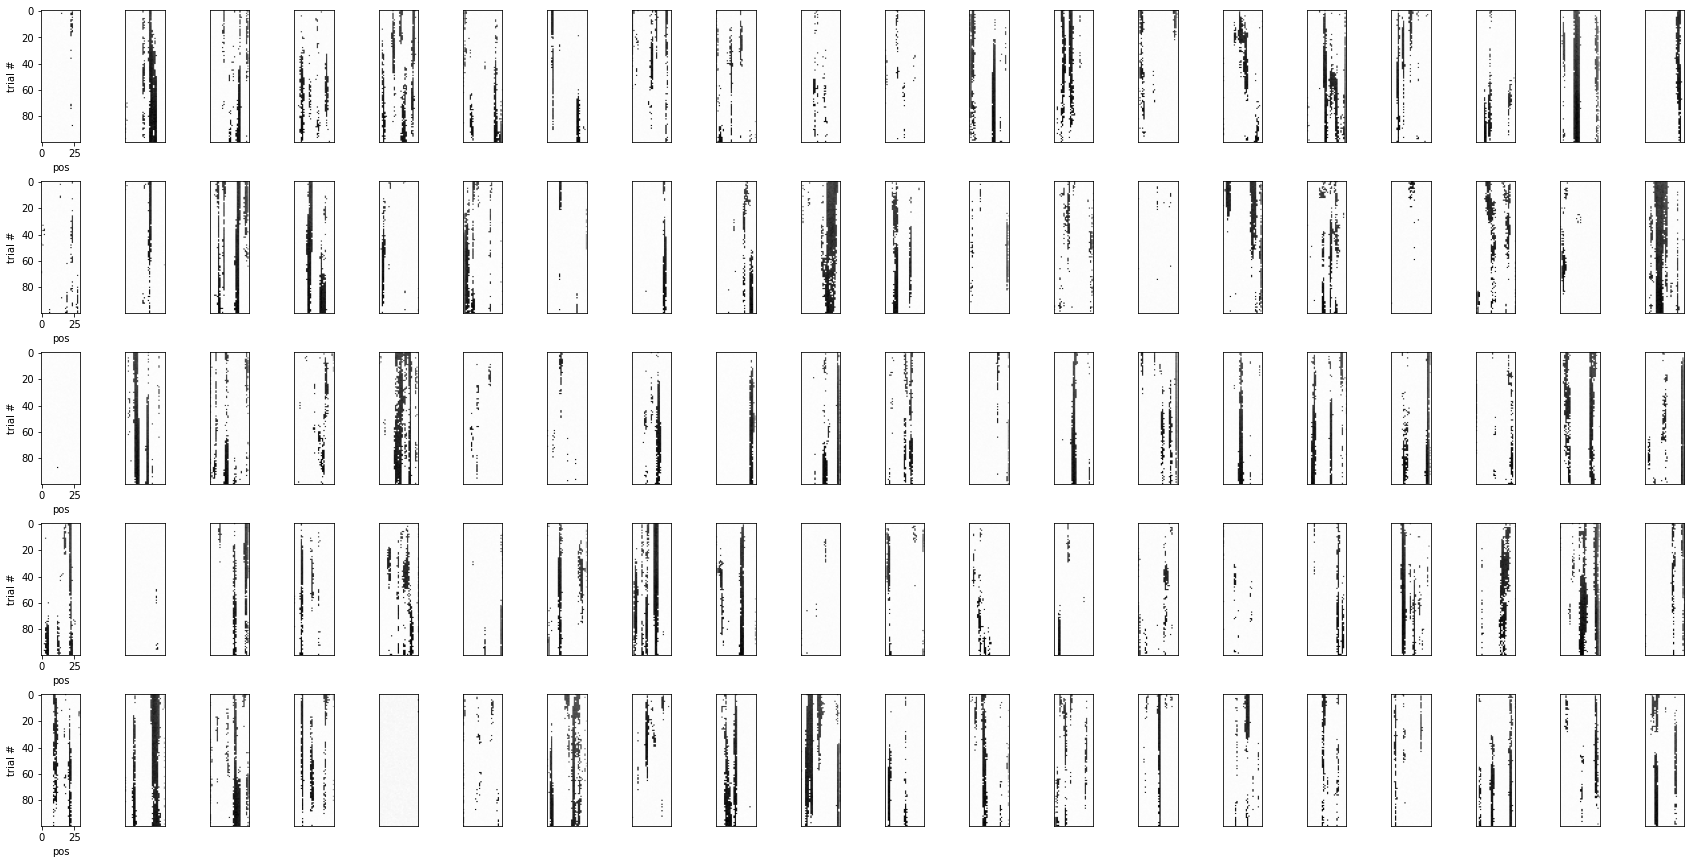

In [8]:
nl_singlecell_fig = stx.wta.plot_cells(nl_ca1, cell_inds = np.arange(0,100))
nl_singlecell_fig.savefig(os.path.join(figdir,"nolearn_single_cells.pdf"), format='pdf')

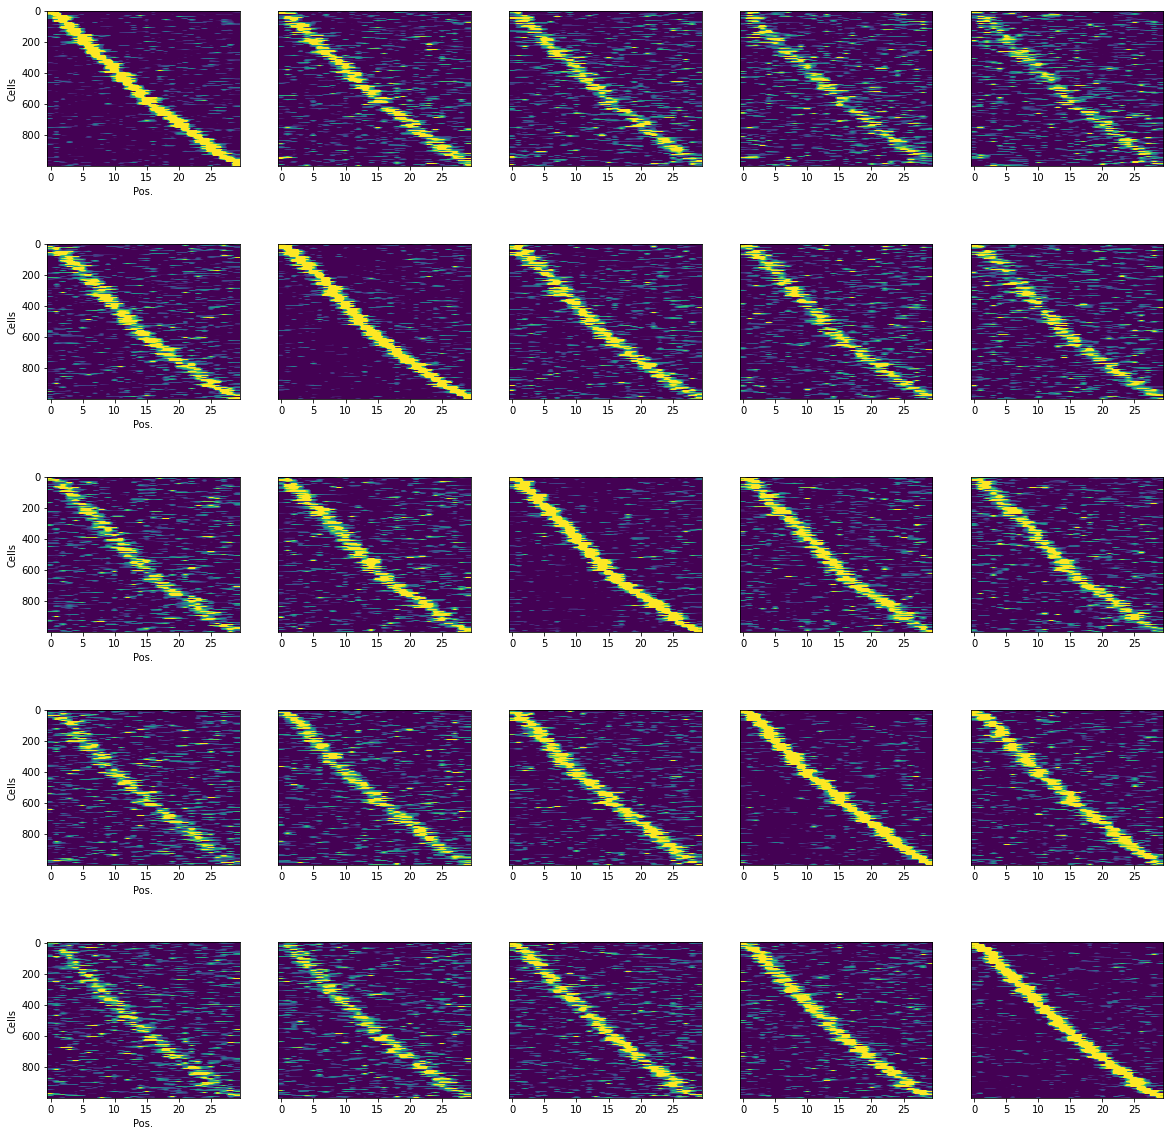

In [9]:
nl_pop_fig = stx.wta.plot_pop_activity(nl_ca1[::20,:,:])
nl_pop_fig.savefig(os.path.join(figdir, "nolearn_pop_placecells.pdf"), format='pdf')

In [10]:
l_kwta = stx.wta.KWTA(eta=1E-4, tau=1E-5, w_norm_decay = 0,ca1_noise= .5, w_sigma_mag = 1E-1, ca3_sigma_mag = .05)
l_ca1 = l_kwta.run_trials()

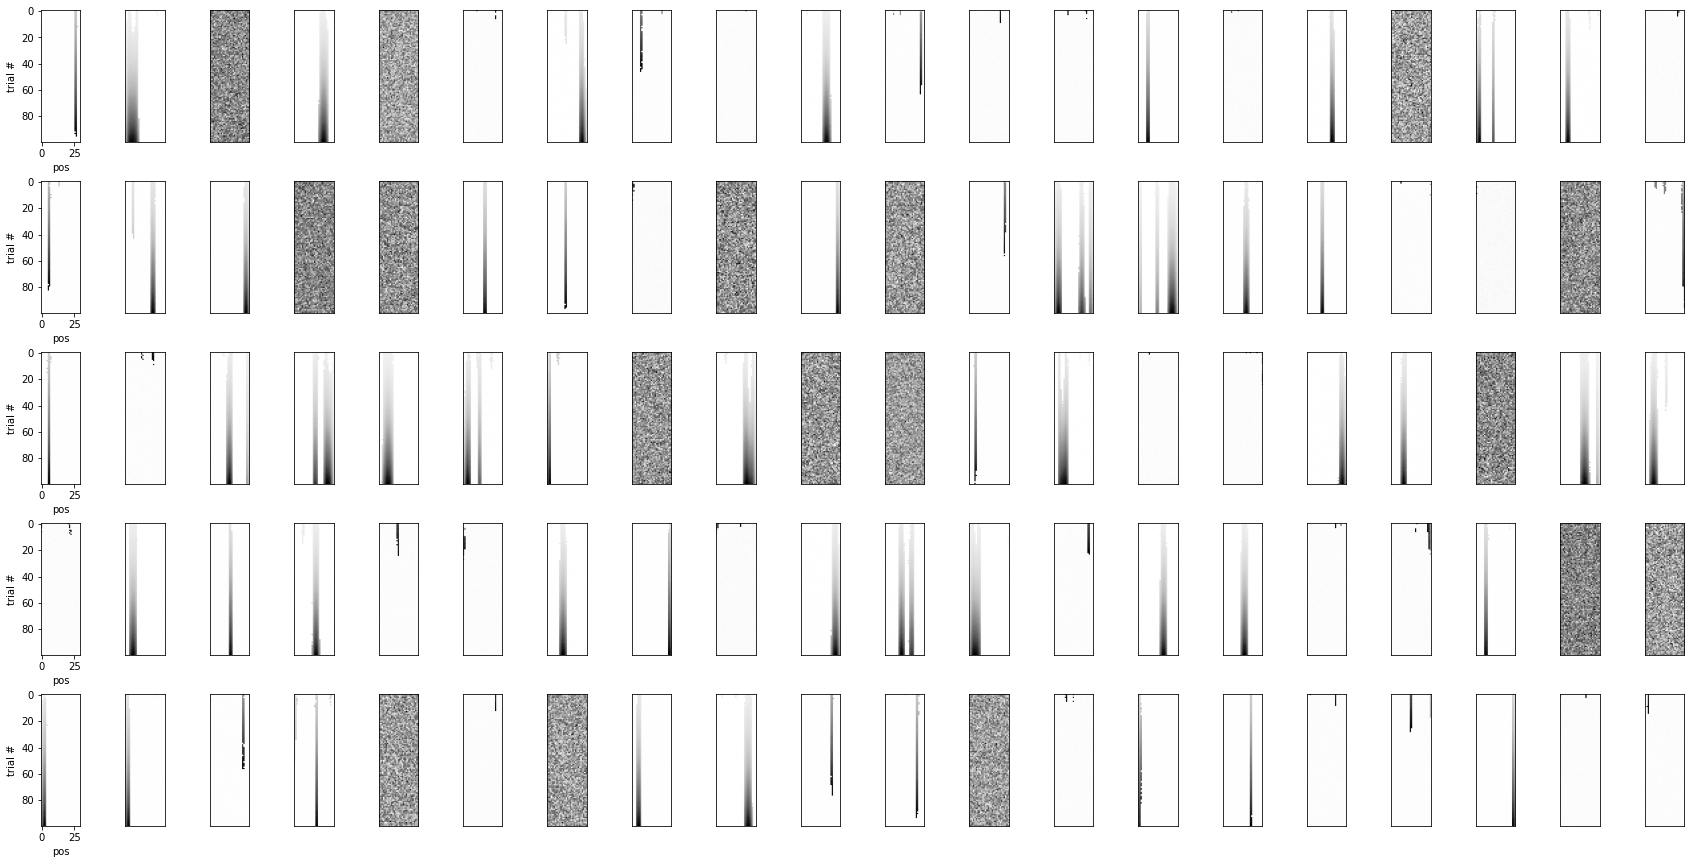

In [11]:
l_singlecell_fig = stx.wta.plot_cells(l_ca1, cell_inds = np.arange(0,100))
l_singlecell_fig.savefig(os.path.join(figdir, "learn_single_cells.pdf"), format='pdf')

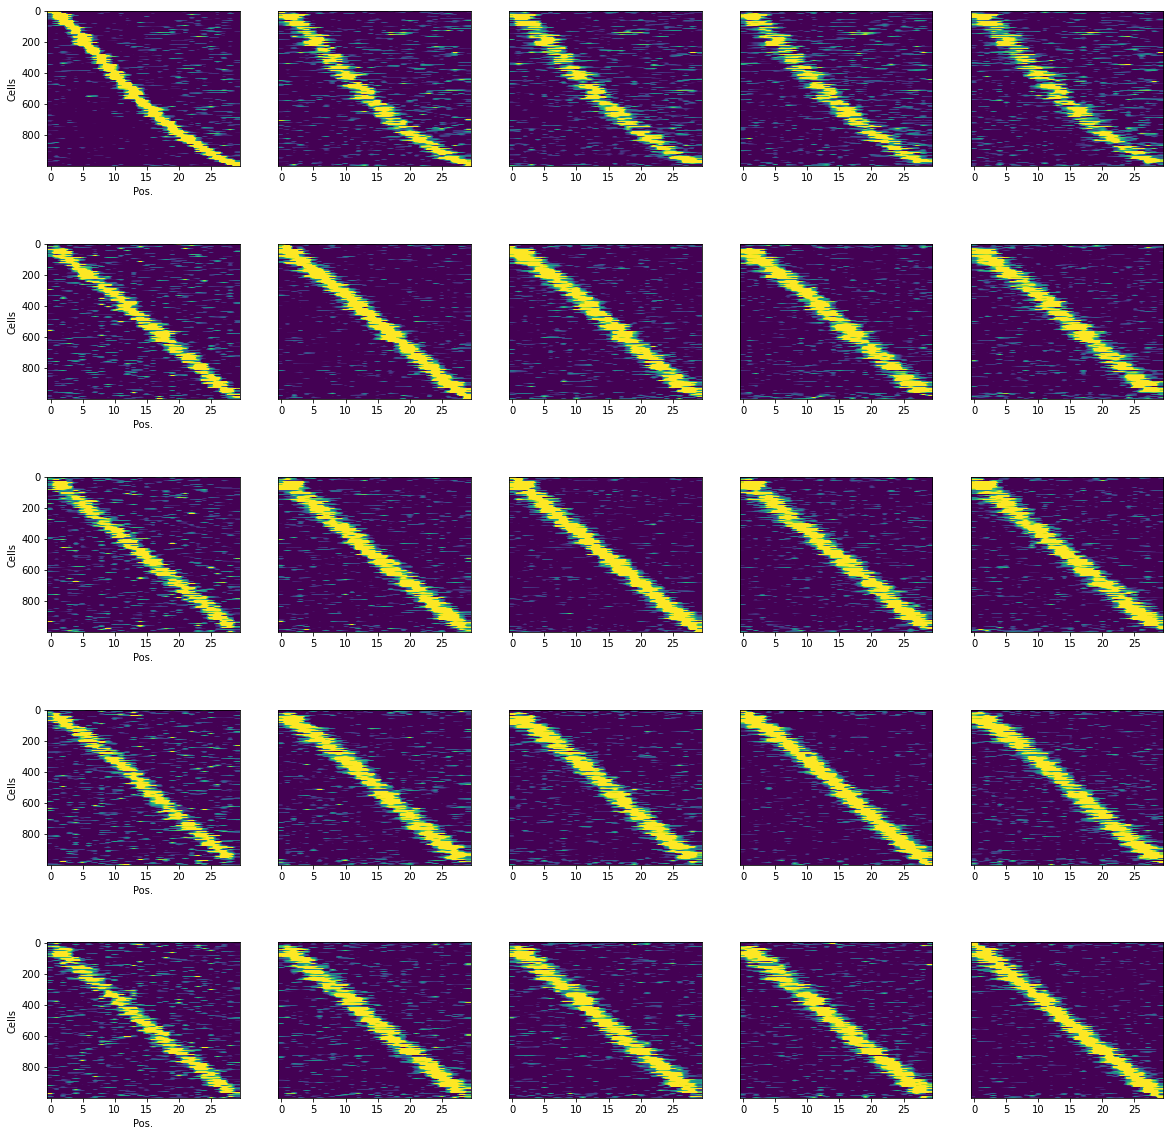

In [12]:
l_pop_fig = stx.wta.plot_pop_activity(l_ca1[::20,:,:])
l_pop_fig.savefig(os.path.join(figdir, "learn_pop_placecells.pdf"), format='pdf')

In [13]:
occ = np.ones([30,])/30
nl_si = tpu.spatial_analyses.spatial_info(nl_ca1.mean(axis=0),occ)
l_si = tpu.spatial_analyses.spatial_info(l_ca1.mean(axis=0),occ)

(array([  7.,   3.,  20., 104., 224., 276., 208.,  95.,  52.,  11.]),
 array([0.0754299 , 0.40133089, 0.72723188, 1.05313287, 1.37903386,
        1.70493485, 2.03083584, 2.35673683, 2.68263782, 3.00853881,
        3.33443981]),
 <BarContainer object of 10 artists>)

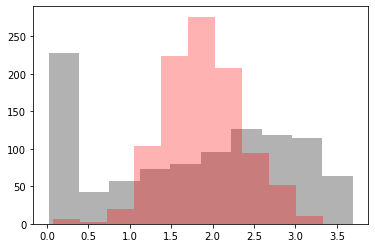

In [14]:
fig,ax = plt.subplots()
ax.hist(l_si, color='black', alpha=.3)
ax.hist(nl_si, color='red', alpha=.3)

In [15]:
l_mask = l_si>1
nl_mask = nl_si>1

l_trial_mat = l_ca1[:,:,l_mask]
l_trial_mat = l_trial_mat[-100:,:,:]
nl_trial_mat = nl_ca1[:,:,nl_mask]
nl_trial_mat = nl_trial_mat[-100:,:,:]

In [16]:
l_std = stx.spatial_analyses.spatial_std(l_trial_mat.mean(axis=0))
nl_std = stx.spatial_analyses.spatial_std(nl_trial_mat.mean(axis=0))

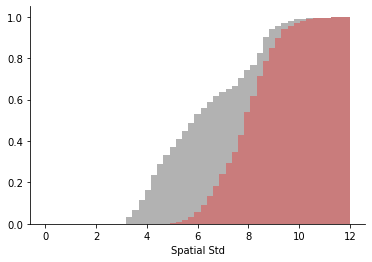

In [24]:
fig,ax = plt.subplots()
bins = np.linspace(0,12)
ax.hist(nl_std, bins = bins, color='red', alpha=.3,density=True, cumulative= True)
ax.hist(l_std,bins=bins, color='black', alpha=.3, zorder=-1,density=True, cumulative=True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Spatial Std')
fig.savefig(os.path.join(figdir,'spatial_std.pdf'), format='pdf')

In [18]:
nl_fw = stx.spatial_analyses.field_width(nl_trial_mat.mean(axis=0))
l_fw = stx.spatial_analyses.field_width(l_trial_mat.mean(axis=0))

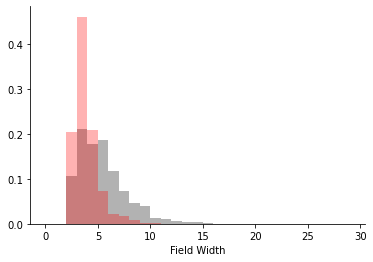

In [25]:
bins = np.arange(0,30)
fig,ax = plt.subplots()
ax.hist(nl_fw, bins = bins, color='red', alpha=.3,density=True)
ax.hist(l_fw,bins=bins, color='black', alpha=.3, zorder=-1,density=True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Field Width')
fig.savefig(os.path.join(figdir,'field_width.pdf'), format = 'pdf')

In [23]:
l_peaks = stx.spatial_analyses.max_counts(l_trial_mat.mean(axis=0))
nl_peaks = stx.spatial_analyses.max_counts(nl_trial_mat.mean(axis=0))

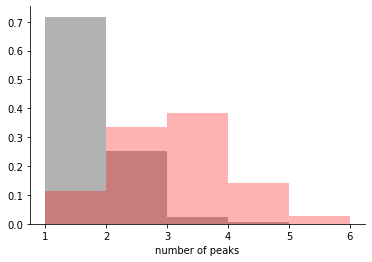

In [26]:
bins = np.arange(1,7)
fig,ax = plt.subplots()
ax.hist(nl_peaks, bins = bins, color='red', alpha=.3,density=True)
ax.hist(l_peaks,bins=bins, color='black', alpha=.3, zorder=-1,density=True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('number of peaks')
fig.savefig(os.path.join(figdir,'num_peaks.pdf'), format = 'pdf')